In [ ]:
#

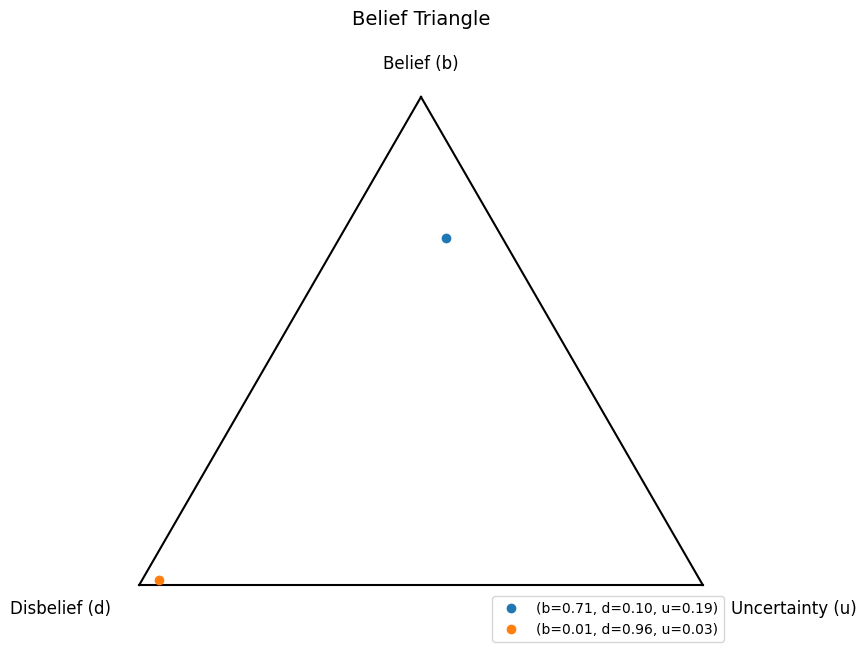

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_belief_triangle(opinions):
    """
    Plots opinions on the belief triangle.

    :param opinions: List of opinions, each as (b, d, u)
    """
    # Define the vertices of the triangle
    vertices = np.array([
        [0.5, np.sqrt(3)/2],  # Belief (b)
        [0, 0],               # Disbelief (d)
        [1, 0]                # Uncertainty (u)
    ])

    # Create the triangle
    plt.figure(figsize=(8, 8))
    plt.plot([vertices[0][0], vertices[1][0]], [vertices[0][1], vertices[1][1]], 'k-')
    plt.plot([vertices[1][0], vertices[2][0]], [vertices[1][1], vertices[2][1]], 'k-')
    plt.plot([vertices[2][0], vertices[0][0]], [vertices[2][1], vertices[0][1]], 'k-')

    # Add labels to the vertices
    plt.text(vertices[0][0], vertices[0][1] + 0.05, 'Belief (b)', ha='center', fontsize=12)
    plt.text(vertices[1][0] - 0.05, vertices[1][1] - 0.05, 'Disbelief (d)', ha='right', fontsize=12)
    plt.text(vertices[2][0] + 0.05, vertices[2][1] - 0.05, 'Uncertainty (u)', ha='left', fontsize=12)

    # Plot the opinions
    for opinion in opinions:
        b, d, u = opinion
        if not np.isclose(b + d + u, 1.0):
            raise ValueError(f"Invalid opinion: b + d + u must equal 1. Got {b + d + u} instead.")

        # Convert (b, d, u) to (x, y) coordinates
        x = b * vertices[0][0] + d * vertices[1][0] + u * vertices[2][0]
        y = b * vertices[0][1] + d * vertices[1][1] + u * vertices[2][1]
        plt.plot(x, y, 'o', label=f"(b={b:.2f}, d={d:.2f}, u={u:.2f})")

    # Formatting
    plt.gca().set_aspect('equal', adjustable='datalim')
    plt.axis('off')
    plt.legend(loc='lower right', fontsize=10)
    plt.title('Belief Triangle', fontsize=14)
    plt.show()

# # Example opinions: (b, d, u)
# opinions = [
#     (0.7, 0.2, 0.1),  # High belief, low uncertainty
#     (0.2, 0.5, 0.3),  # More disbelief
#     (0.1, 0.1, 0.8),  # Mostly uncertainty
#     (0.5, 0.4, 0.1)   # Balanced belief and disbelief
# ]


# Example opinions: (b, d, u)
opinions = [
    (0.71, 0.1, 0.19),  # High belief, low uncertainty
    (0.01, 0.96, 0.03),  # More disbelief
]

# Plot the belief triangle with these opinions
plot_belief_triangle(opinions)

In [ ]:
import numpy as np

def subjective_logic_fusion_with_base_rates(
    b1, d1, u1, b2, d2, u2, a_R, a_B, adaptive_base_rate=False
):
    """
    Fuse two opinions using Subjective Logic, with optional adaptive base rates.

    Parameters:
    - b1, d1, u1: Belief, disbelief, uncertainty for opinion 1.
    - b2, d2, u2: Belief, disbelief, uncertainty for opinion 2.
    - a_R, a_B: Base rates for R and B.
    - adaptive_base_rate: If True, adapt base rates dynamically.

    Returns:
    - Fused probabilities (P(R), P(B)).
    """
    # Calculate conflict denominator (k)
    k = (
        u1 * u2
        + b1 * u2 + b2 * u1 + b1 * b2
        + d1 * u2 + d2 * u1 + d1 * d2
    )

    # Fused belief, disbelief, and uncertainty
    b_fused = (b1 * u2 + b2 * u1 + b1 * b2) / k
    d_fused = (d1 * u2 + d2 * u1 + d1 * d2) / k
    u_fused = (u1 * u2) / k

    # Optionally adapt base rates
    if adaptive_base_rate:
        a_R = b1 / (b1 + b2) if b1 + b2 > 0 else 0.5
        a_B = 1 - a_R

    # Derived probabilities using base rates
    P_R = b_fused + a_R * u_fused
    P_B = d_fused + a_B * u_fused

    return P_R, P_B

def dempster_shafer_fusion(b1, d1, u1, b2, d2, u2):
    """
    Fuse two opinions using Dempster-Shafer Theory.

    Parameters:
    - b1, d1, u1: Belief, disbelief, uncertainty for opinion 1.
    - b2, d2, u2: Belief, disbelief, uncertainty for opinion 2.

    Returns:
    - Fused belief, disbelief, and uncertainty.
    """
    # Calculate conflict denominator (k)
    k = (
        u1 * u2
        + b1 * u2 + b2 * u1 + b1 * b2
        + d1 * u2 + d2 * u1 + d1 * d2
    )

    # Fused belief, disbelief, and uncertainty
    b_fused = (b1 * u2 + b2 * u1 + b1 * b2) / k
    d_fused = (d1 * u2 + d2 * u1 + d1 * d2) / k
    u_fused = (u1 * u2) / k

    return b_fused, d_fused, u_fused

# Example inputs
b1, d1, u1 = 0.7, 0.2, 0.1  # Opinion 1 (Sensor 1)
b2, d2, u2 = 0.4, 0.4, 0.2  # Opinion 2 (Sensor 2)
a_R, a_B = 0.8, 0.2          # Base rates (prior knowledge)

# Subjective Logic Fusion with and without adaptive base rates
P_R_static, P_B_static = subjective_logic_fusion_with_base_rates(b1, d1, u1, b2, d2, u2, a_R, a_B)
P_R_adaptive, P_B_adaptive = subjective_logic_fusion_with_base_rates(
    b1, d1, u1, b2, d2, u2, a_R, a_B, adaptive_base_rate=True
)

# Dempster-Shafer Fusion
b_fused_ds, d_fused_ds, u_fused_ds = dempster_shafer_fusion(b1, d1, u1, b2, d2, u2)

# Print results
print("Subjective Logic (Static Base Rates):")
print(f"P(R) = {P_R_static:.4f}, P(B) = {P_B_static:.4f}")

print("\nSubjective Logic (Adaptive Base Rates):")
print(f"P(R) = {P_R_adaptive:.4f}, P(B) = {P_B_adaptive:.4f}")

print("\nDempster-Shafer Fusion:")
print(f"Belief (R) = {b_fused_ds:.4f}, Belief (B) = {d_fused_ds:.4f}, Uncertainty = {u_fused_ds:.4f}")


Subjective Logic (Static Base Rates):
P(R) = 0.7437, P(B) = 0.2562

Subjective Logic (Adaptive Base Rates):
P(R) = 0.7386, P(B) = 0.2614

Dempster-Shafer Fusion:
Belief (R) = 0.7187, Belief (B) = 0.2500, Uncertainty = 0.0312


In [ ]:
# Adaptation for Code
import tensorflow as tf

# Fusion Rules
class SubjectiveLogicFusion(tf.keras.layers.Layer):
    def __init__(self, adaptive_base_rate=True, **kwargs):
        super(SubjectiveLogicFusion, self).__init__(**kwargs)
        self.adaptive_base_rate = adaptive_base_rate

    def build(self, input_shape):
        self.input_dim = input_shape[-2]  # Number of mass functions per pixel

    def call(self, inputs):
        m1 = inputs[:, :, :, 0, :]
        u1 = tf.expand_dims(m1[:, :, :, -1], -1)  # Uncertainty from the first mass function

        for i in range(self.input_dim - 1):
            m2 = inputs[:, :, :, i + 1, :]
            u2 = tf.expand_dims(m2[:, :, :, -1], -1)  # Uncertainty from the second mass function

            # Extract belief (b) and disbelief (d) components
            b1, d1, u1 = m1[:, :, :, 0], m1[:, :, :, 1], m1[:, :, :, 2]
            b2, d2, u2 = m2[:, :, :, 0], m2[:, :, :, 1], m2[:, :, :, 2]

            # Adaptive base rates if enabled
            if self.adaptive_base_rate:
                a_R = tf.where(b1 + b2 > 0, b1 / (b1 + b2), 0.5)
                a_B = 1 - a_R
            else:
                a_R = 0.5
                a_B = 0.5

            # Fusion logic
            k = u1 * u2 + b1 * u2 + b2 * u1 + b1 * b2 + d1 * u2 + d2 * u1 + d1 * d2

            b_fused = (b1 * u2 + b2 * u1 + b1 * b2) / k
            d_fused = (d1 * u2 + d2 * u1 + d1 * d2) / k
            u_fused = (u1 * u2) / k

            # Derived probabilities using base rates
            P_R = b_fused + a_R * u_fused
            P_B = d_fused + a_B * u_fused

            # Reconstruct mass function with fused values
            m1 = tf.stack([P_R, P_B, u_fused], axis=-1)

        return m1

    def get_config(self):
        config = super(SubjectiveLogicFusion, self).get_config()
        config.update({
            "adaptive_base_rate": self.adaptive_base_rate
        })
        return config

# Normalization Layer
class DS3_normalize(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(DS3_normalize, self).__init__(**kwargs)

    def call(self, inputs):
        mass_combine_normalize = inputs / tf.reduce_sum(inputs, axis=-1, keepdims=True)
        return mass_combine_normalize

    def get_config(self):
        config = super(DS3_normalize, self).get_config()
        return config

# Example usage
if __name__ == "__main__":
    import numpy as np

    # Define mass functions
    m1 = np.array([0.71, 0.10, 0.19])  # m1(A), m1(B), m1(A ∪ B)
    m2 = np.array([0.01, 0.96, 0.03])  # m2(A), m2(B), m2(A ∪ B)

    # Create a 5D input tensor for the fusion layers
    batch_size, height, width, input_dim, mass_dim = 1, 1, 1, 2, 3
    inputs = np.zeros((batch_size, height, width, input_dim, mass_dim))

    # Assign m1 and m2 to the input tensor
    inputs[0, 0, 0, 0, :] = m1  # First mass function
    inputs[0, 0, 0, 1, :] = m2  # Second mass function

    # Convert to TensorFlow tensor
    inputs_tf = tf.convert_to_tensor(inputs, dtype=tf.float32)

    # Initialize Subjective Logic fusion layer
    sl_fusion_layer = SubjectiveLogicFusion()

    # Perform fusion
    output_fusion = sl_fusion_layer(inputs_tf)
    output_normalized = DS3_normalize()(output_fusion)

    print("Fused Mass Functions:", output_fusion.numpy())
    print("Normalized Mass Functions:", output_normalized.numpy())


Fused Mass Functions: [[[[0.11317213 0.88682795 0.01795841]]]]
Normalized Mass Functions: [[[[0.11117558 0.8711828  0.01764159]]]]
